In [1]:
#import library 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf



# Part 1

<b> <h2> Part 1 we will build RE system on small dataset </h2> </b>

In [2]:
#read small csv file (indian country movie dataset)

movie_ind_ori=pd.read_csv('../data/country_movies/IND_NF.csv')
movie_ind=movie_ind_ori.copy()
movie_ind_ori.head(10)

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent
0,37,Movie,Unbroken,USA,Drama,2014-12-25,False,72%,51%,IND,https://flixpatrol.com/title/unbroken,ASI
1,37,TV Show,Masaba Masaba,India,Comedy,2020-08-28,True,68%,NaN,IND,https://flixpatrol.com/title/masaba-masaba,ASI
2,36,Movie,Class of '83,India,Drama,2020-08-21,False,NaN,20%,IND,https://flixpatrol.com/title/class-of-83,ASI
3,36,TV Show,Masaba Masaba,India,Comedy,2020-08-28,True,68%,NaN,IND,https://flixpatrol.com/title/masaba-masaba,ASI
4,35,Movie,Class of '83,India,Drama,2020-08-21,False,NaN,20%,IND,https://flixpatrol.com/title/class-of-83,ASI
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83%,87%,IND,https://flixpatrol.com/title/lucifer,ASI
6,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,False,31%,100%,IND,https://flixpatrol.com/title/gunjan-saxena-the...,ASI
7,34,TV Show,Dark Desire,Mexico,Drama,2020-07-15,True,75%,NaN,IND,https://flixpatrol.com/title/dark-desire,ASI
8,33,Movie,Raat Akeli Hai,India,Crime,2020-07-31,False,78%,NaN,IND,https://flixpatrol.com/title/raat-akeli-hai,ASI
9,33,TV Show,Dark Desire,Mexico,Drama,2020-07-15,True,75%,NaN,IND,https://flixpatrol.com/title/dark-desire,ASI


In [3]:
movie_ind.shape

(48, 12)

In [4]:
movie_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   week           48 non-null     int64 
 1   show_type      48 non-null     object
 2   title          48 non-null     object
 3   ori_country    48 non-null     object
 4   genre          48 non-null     object
 5   release_date   48 non-null     object
 6   is_NF_Ori      48 non-null     bool  
 7   imdb_rating    40 non-null     object
 8   rt_rating      34 non-null     object
 9   country_chart  48 non-null     object
 10  show_link      48 non-null     object
 11  Continent      48 non-null     object
dtypes: bool(1), int64(1), object(10)
memory usage: 4.3+ KB


In [5]:
%matplotlib inline

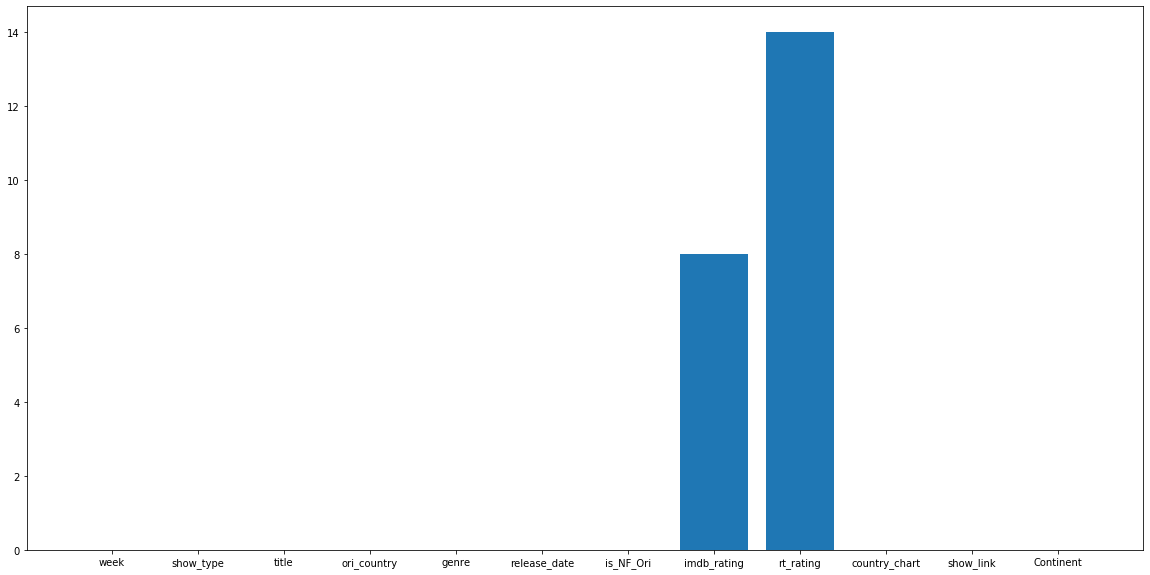

In [6]:
nan_columns = []
nan_values = []

for column in movie_ind.columns:
    
    nan_columns.append(column)
    nan_values.append(movie_ind[column].isnull().sum())
    

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(nan_columns, nan_values)
plt.show()

<b> <h2> Visualiazation </h2> </b>

In [7]:
movie_ind.imdb_rating.values

array(['72%', '68%', nan, '68%', nan, '83%', '31%', '75%', '78%', '75%',
       '78%', '83%', '62%', '69%', nan, '69%', '82%', '87%', nan, '87%',
       '66%', '87%', '66%', '87%', '35%', '87%', '35%', '84%', nan, '70%',
       nan, nan, nan, '84%', '54%', '78%', '28%', '78%', '70%', '78%',
       '70%', '42%', '55%', '84%', '78%', '84%', '78%', '84%'],
      dtype=object)

In [8]:
movie_ind.columns


Index(['week', 'show_type', 'title', 'ori_country', 'genre', 'release_date',
       'is_NF_Ori', 'imdb_rating', 'rt_rating', 'country_chart', 'show_link',
       'Continent'],
      dtype='object')

In [9]:
movie_ind=movie_ind.loc[:,['week','show_type','title','ori_country','genre','release_date','imdb_rating','rt_rating','is_NF_Ori']]
movie_ind['imdb_rating']=movie_ind['imdb_rating'].apply(lambda x :np.nan if pd.isnull(x) else float(x[0:-1]))
movie_ind['rt_rating']=movie_ind['rt_rating'].apply(lambda x :    np.nan if pd.isnull(x) else float(x[0:-1]))


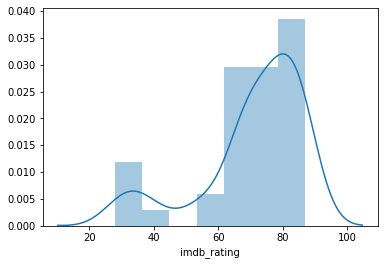

In [10]:
sns.distplot(movie_ind['imdb_rating'])

In [11]:

movie_ind_no_null=movie_ind.dropna()

In [12]:
movie_ind_no_null['show_type'].unique()

array(['Movie', 'TV Show'], dtype=object)

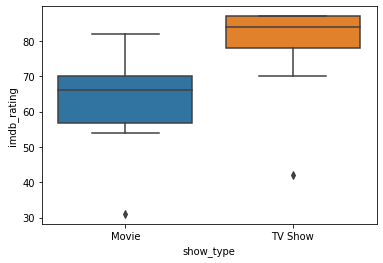

In [13]:
sns.boxplot('show_type','imdb_rating',data=movie_ind_no_null)

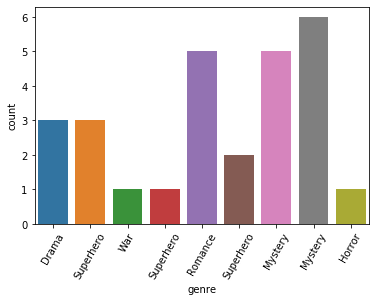

In [14]:
sns.countplot(movie_ind_no_null['genre']).set_xticklabels(movie_ind_no_null['genre'],rotation=60)
plt.show()

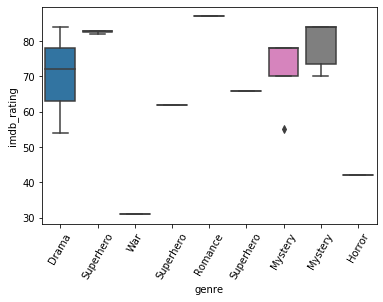

In [15]:
sns.boxplot(movie_ind_no_null['genre'],movie_ind_no_null['imdb_rating']).set_xticklabels(movie_ind_no_null['genre'],rotation=60)
plt.show()

In [16]:
movie_ind_no_null['ori_country'].unique()

array(['USA', 'India', 'United Kingdom', 'Germany', 'Spain', 'Italy'],
      dtype=object)

In [17]:
%matplotlib inline

[Text(0, 0, 'USA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Italy')]

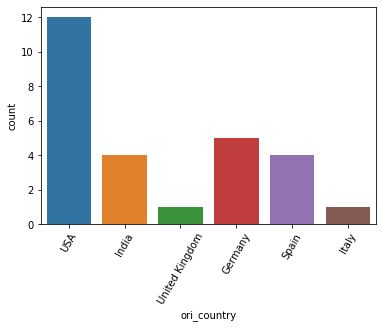

In [18]:
sns.countplot(movie_ind_no_null['ori_country']).set_xticklabels(movie_ind_no_null['ori_country'].unique(),rotation=60)

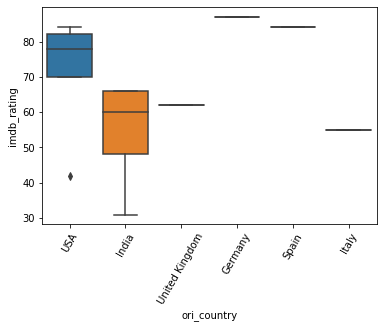

In [19]:
sns.boxplot(movie_ind_no_null['ori_country'],movie_ind_no_null['imdb_rating']).set_xticklabels(movie_ind_no_null['ori_country'].unique(),rotation=60)
plt.show()

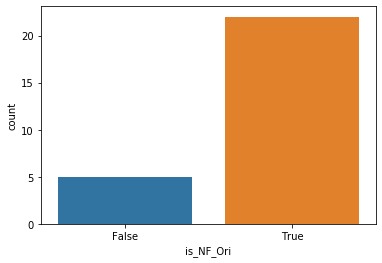

In [20]:
sns.countplot(movie_ind_no_null['is_NF_Ori'])

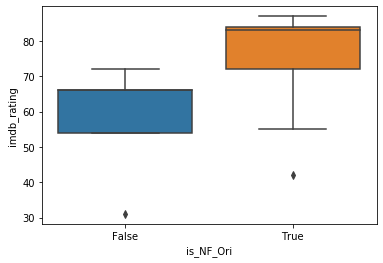

In [21]:
sns.boxplot('is_NF_Ori','imdb_rating',data=movie_ind_no_null)

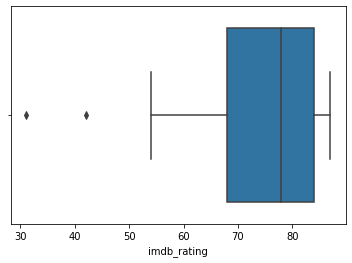

In [22]:
sns.boxplot(movie_ind_no_null['imdb_rating'])

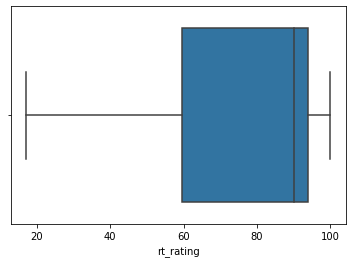

In [23]:
sns.boxplot(movie_ind_no_null['rt_rating'])

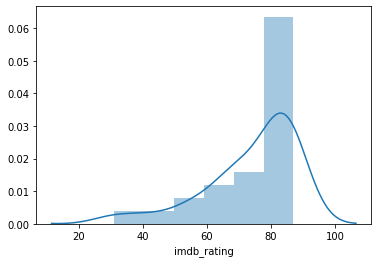

In [24]:
sns.distplot(movie_ind_no_null['imdb_rating'])

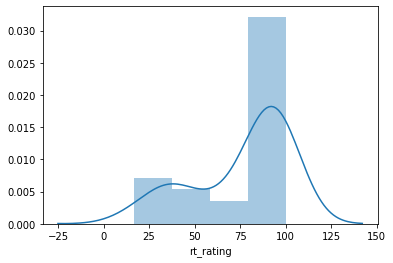

In [25]:
sns.distplot(movie_ind_no_null['rt_rating'])

<b> <h2>Purpose: Handle missing data (imdb_rating and rt_rating ) </h2> </b>

<ul> <li> <b> How can we  fill missing value ?  </b> </li>
<br>
    <li> <b> Ans:Prediction (Regression)</b> </li>
<br>
    <li> <b> More Explaination below Building Pipeline Section </b> </li> </ul>

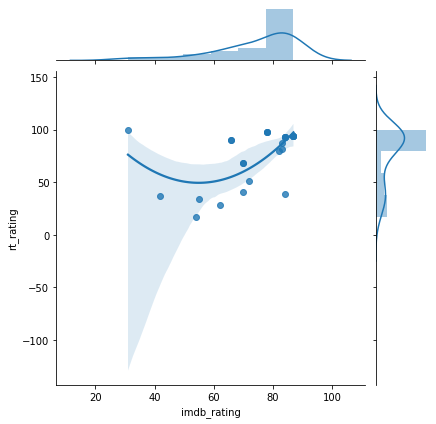

In [26]:
sns.jointplot('imdb_rating','rt_rating',kind='reg',data=movie_ind_no_null,order=2)


In [27]:
model=smf.ols('rt_rating~I(imdb_rating**2)',data=movie_ind_no_null).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rt_rating   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     9.745
Date:                Mon, 16 Nov 2020   Prob (F-statistic):            0.00450
Time:                        13:50:12   Log-Likelihood:                -121.49
No. Observations:                  27   AIC:                             247.0
Df Residuals:                      25   BIC:                             249.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              34.3644     13.985      2.457      0.021       5.562      63.167
I(imdb_rating ** 2)     0.0073      0.002      3.122      0.004       0.002       0.012
==============================================================================
Omnibus:                        1.739   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                0.593
Skew:                           0.001   Prob(JB):                        0.743
Kurtosis:                       3.726   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

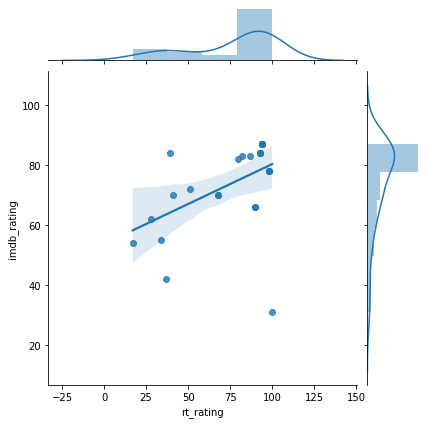

In [28]:
sns.jointplot('rt_rating','imdb_rating',kind='reg',data=movie_ind_no_null,order=1)


In [29]:
model1=smf.ols('imdb_rating~I(rt_rating**1)',data=movie_ind_no_null).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            imdb_rating   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     7.276
Date:                Mon, 16 Nov 2020   Prob (F-statistic):             0.0123
Time:                        13:50:14   Log-Likelihood:                -106.82
No. Observations:                  27   AIC:                             217.6
Df Residuals:                      25   BIC:                             220.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            53.7224      7.893      6.807      0.000      37.467      69.977
I(rt_rating ** 1)     0.2659      0.099      2.697      0.012       0.063       0.469
==============================================================================
Omnibus:                       29.692   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.382
Skew:                          -2.214   Prob(JB):                     6.35e-15
Kurtosis:                       9.205   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Building Pipelines

<b>  <h2> Data Cleaning Part </h2> </b> 

In [30]:
def clean_data(movie_ind):
    
        movie_ind=movie_ind.loc[:,['week','show_type','title','ori_country','genre','release_date','imdb_rating','rt_rating','is_NF_Ori']]
        movie_ind['imdb_rating']=movie_ind['imdb_rating'].apply(lambda x :np.nan if pd.isnull(x) else( float(x[0:-1])))
        movie_ind['rt_rating']=movie_ind['rt_rating'].apply(lambda x :    np.nan if pd.isnull(x) else(float(x[0:-1])))
        
        return movie_ind

In [31]:
movie_ind_c=clean_data(movie_ind_ori)

movie_ind_c.head()

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori
0,37,Movie,Unbroken,USA,Drama,2014-12-25,72.0,51.0,False
1,37,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,NaN,True
2,36,Movie,Class of '83,India,Drama,2020-08-21,NaN,20.0,False
3,36,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,NaN,True
4,35,Movie,Class of '83,India,Drama,2020-08-21,NaN,20.0,False


<b> <h2> fill the missing values </h2> </b> 

In [32]:
def missing_valuefill(df):
    
    df_final=df.loc[~df.title.duplicated(keep='first')] #remove duplicate title rows
 
    model=smf.ols('rt_rating~I(imdb_rating**2)',data=df).fit()
    model1=smf.ols('imdb_rating~I(rt_rating**1)',data=df).fit()
    predict_imdb_rt=pd.DataFrame({'rt_predict':model.predict(df['imdb_rating']),
                              'imdb_predict':model1.predict(df['rt_rating'])})
    
    #Above dataframe help to fill a missing value into our dataset 
    
    df_final['imdb_rating'].fillna(predict_imdb_rt['imdb_predict'],inplace=True)
    df_final['rt_rating'].fillna(predict_imdb_rt['rt_predict'],inplace=True) 
    df_final=round(df_final,0)
    df_final=df_final.dropna() # if still any none value left then drop it
    
    df_final.reset_index(drop=True,inplace=True)
    return df_final
              

In [33]:
complete_movie_ind=missing_valuefill(movie_ind_c)

<h2> <b> we will prepare data for Recommandation algo  </b> </h2>

In [34]:
def prepare_data(data):
    col=['show_type','ori_country','genre','is_NF_Ori']
    data['merge_word'] = data[col].values.tolist()
    
    return data


In [35]:
data_ready=prepare_data(complete_movie_ind)
data_ready.head()

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori,merge_word
0,37,Movie,Unbroken,USA,Drama,2014-12-25,72.0,51.0,False,"[Movie, USA, Drama, False]"
1,37,TV Show,Masaba Masaba,India,Comedy,2020-08-28,68.0,68.0,True,"[TV Show, India, Comedy, True]"
2,36,Movie,Class of '83,India,Drama,2020-08-21,59.0,20.0,False,"[Movie, India, Drama, False]"
3,35,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True,"[TV Show, USA, Superhero, True]"
4,34,Movie,Gunjan Saxena: The Kargil Girl,India,War,2020-08-12,31.0,100.0,False,"[Movie, India, War, False]"


<b> Main Part Of RE  </b> 
<ul> 
<br>
    <li> <b> Question is how much movie A similar to movie B in terms of rank ? </b> </li>
<br>
    <li> <b> find n &#10006; n matrix (n=movie)</b> </li>
<br>
    <li> <b> Below pseudo_rank function  will  calculate above n &#10006; n matrix </b> </li>
    
</ul>
    

In [36]:
def pseudo_rank(data_movie):
    matrix=[]
    for i in range (data_movie.shape[0]) :
        s=data_movie.loc[i,['merge_word']].values[0]
        n1=data_movie.loc[i,['title']].values

        l1=[]
        for j in range(data_movie.shape[0]):

            u= data_movie.loc[j,['merge_word']].values[0]
            m=0
            if(s[2]==u[2]):
                n2=data_movie.loc[j,['title']].values
                p1=float(data_movie.loc[j,['imdb_rating']])
                p2=float(data_movie.loc[j,['rt_rating']])
                m=1+((p1+p2)/100)
                if(s[3]):
                    m+=0.4

            l1.append(round(m,2))
        matrix.append(l1)
    matrix=np.array(matrix)
    n1=list(data_movie['title'])
    df_final=pd.DataFrame(data=matrix,index=n1,columns=n1)
    return df_final

In [37]:
final_data=pseudo_rank(data_ready)

In [38]:
final_data

,Unbroken,Masaba Masaba,Class of '83,Lucifer,Gunjan Saxena: The Kargil Girl,Dark Desire,Raat Akeli Hai,The Umbrella Academy,The Kissing Booth 2,Indian Matchmaking,...,Space Force,Betaal,Money Heist,Love Aaj Kal,Never Have I Ever,Mrs. Serial Killer,Extraction,Too Hot to Handle,Love. Wedding. Repeat,Money Heist: The Phenomenon
Unbroken,2.23,0.00,1.79,0.0,0.00,2.51,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,1.71,0.00,0.00,0.00,0.00,0.00,0.00
Masaba Masaba,0.00,2.76,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,2.51,0.00,0.00,0.00,3.16,0.00,0.00,0.00,2.29,0.00
Class of '83,2.23,0.00,1.79,0.0,0.00,2.51,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,1.71,0.00,0.00,0.00,0.00,0.00,0.00
Lucifer,0.00,0.00,0.00,3.1,0.00,0.00,0.00,3.05,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gunjan Saxena: The Kargil Girl,0.00,0.00,0.00,0.0,2.31,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dark Desire,2.63,0.00,2.19,0.0,0.00,2.91,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,2.11,0.00,0.00,0.00,0.00,0.00,0.00
Raat Akeli Hai,0.00,0.00,0.00,0.0,0.00,0.00,2.57,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
The Umbrella Academy,0.00,0.00,0.00,3.1,0.00,0.00,0.00,3.05,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
The Kissing Booth 2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2.3,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Indian Matchmaking,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,2.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.79,0.00,0.00


In [39]:
from termcolor import colored
print(colored('Below list is total movie and Tv show (list is small because we have not large data)', attrs=['bold']))
print()
print(final_data.index)

Below list is total movie and Tv show (list is small because we have not large data)

Index(['Unbroken', 'Masaba Masaba', 'Class of '83', 'Lucifer',
       'Gunjan Saxena: The Kargil Girl', 'Dark Desire', 'Raat Akeli Hai',
       'The Umbrella Academy', 'The Kissing Booth 2', 'Indian Matchmaking',
       'MILF', 'The Old Guard', 'Dark', 'Bulbbul', '365 Days',
       '13 Reasons Why', 'Malang', 'Space Force', 'Betaal', 'Money Heist',
       'Love Aaj Kal', 'Never Have I Ever', 'Mrs. Serial Killer', 'Extraction',
       'Too Hot to Handle', 'Love. Wedding. Repeat',
       'Money Heist: The Phenomenon'],
      dtype='object')


<h2> <b> This fuction help to find out similar movie </b> </h2>

In [40]:
def movie_re(similar_movie_list,data_ready):
    print("Note: please do not make any spelling mistake to enter movie name or Tv show name  just copy and paste from above list \n ")
    x=input("Enter movie or TV show From above list := ")
    
    df=final_data.loc[x,:].to_frame()
    df=df.sort_values(by=x,ascending=False,axis=0)
    df=df.loc[df[x]>0.3]
    df['title'] = df.index
    df.reset_index(0,drop=True, inplace=True)
    df= pd.merge(df, data_ready.loc[:,['title','show_type']],how='inner', on=['title'])
    df.drop(df.loc[df['title']==x].index, inplace=True)
    df.reset_index(0,drop=True,inplace=True)
    df=df[['title','show_type',x]]
    
    return df
    
    

In [41]:
#similar movie 
movie_re(final_data,data_ready)

Note: please do not make any spelling mistake to enter movie name or Tv show name  just copy and paste from above list 
 
Enter movie or TV show From above list := Dark


,title,show_type,Dark


# Part 2

<b><i> Note :</i> below two commented  cell use for combine csv file(reason:Country movies folder have diffrent csv each and every country so we need to combine those csv file and create large Dataset). <br> <i> Instruction :</i> user don't need to run this code user can go below csv file and get country_movies_combine csv </b>

In [42]:
# import os
# import glob
# import pandas as pd
# # os.chdir("../data/country_movies")
# os.chdir("../data/country_movies")


In [43]:
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')


In [44]:
#Read file 
combined_csv=pd.read_csv('../data/country_movies/country_movie_combine.csv')

In [45]:
combined_csv=combined_csv.reset_index(level=0,drop=True)
combined_csv.head(10)

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Continent/the-letter-for-the-king-2020,EUR,rel_yr,rel_mt
0,37,Movie,#Alive,South Korea,Horror,2020-09-08,False,62%,86%,ARE,https://flixpatrol.com/title/alive-2020,ASI,NaN,NaN,NaN,NaN
1,37,TV Show,Away,USA,Science Fiction,2020-09-04,True,71%,73%,ARE,https://flixpatrol.com/title/away-2020,ASI,NaN,NaN,NaN,NaN
2,36,Movie,Skyscraper,USA,Action,2018-07-04,False,61%,48%,ARE,https://flixpatrol.com/title/skyscraper,ASI,NaN,NaN,NaN,NaN
3,36,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83%,87%,ARE,https://flixpatrol.com/title/lucifer,ASI,NaN,NaN,NaN,NaN
4,35,Movie,Project Power,USA,Action,2020-08-14,True,61%,63%,ARE,https://flixpatrol.com/title/project-power,ASI,NaN,NaN,NaN,NaN
5,35,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83%,87%,ARE,https://flixpatrol.com/title/lucifer,ASI,NaN,NaN,NaN,NaN
6,37,Movie,The Emoji Movie,USA,Animated,2017-07-28,False,14%,8%,ARG,https://flixpatrol.com/title/the-emoji-movie,AME,NaN,NaN,NaN,NaN
7,37,TV Show,Cobra Kai,USA,Action,2018-05-02,False,88%,94%,ARG,https://flixpatrol.com/title/cobra-kai,AME,NaN,NaN,NaN,NaN
8,36,Movie,The Emoji Movie,USA,Animated,2017-07-28,False,14%,8%,ARG,https://flixpatrol.com/title/the-emoji-movie,AME,NaN,NaN,NaN,NaN
9,36,TV Show,Cobra Kai,USA,Action,2018-05-02,False,88%,94%,ARG,https://flixpatrol.com/title/cobra-kai,AME,NaN,NaN,NaN,NaN


<b>  <h2> Data Cleaning Part </h2> </b> 

In [46]:
# helper Function for cleaning data
def fun(x):
    if(x == None or x==0):
        return np.nan
    elif(isinstance(x,int)):
        return x 
    else:
        try:
            if '%' in x:
                return float(x[0:-1])
        except TypeError:
            
             return float(x)

In [47]:
def clean_data(movie_ind):
    
        movie_ind=movie_ind.loc[:,['week','show_type','title','ori_country','genre','release_date','imdb_rating','rt_rating','is_NF_Ori']]
        movie_ind['imdb_rating']=movie_ind['imdb_rating'].apply(lambda x : fun(x))
        movie_ind['rt_rating']=movie_ind['rt_rating'].apply(lambda x :    fun(x))
        
        return movie_ind

In [48]:
df=clean_data(combined_csv)

In [49]:
# checking the  how much null value
nan_columns = []
nan_values = []
def check_nan(movie_ind):
    for column in movie_ind.columns:

        nan_columns.append(column)
        nan_values.append(movie_ind[column].isnull().sum())


    fig, ax = plt.subplots(figsize=(20,10))
    plt.bar(nan_columns, nan_values)
    plt.show()

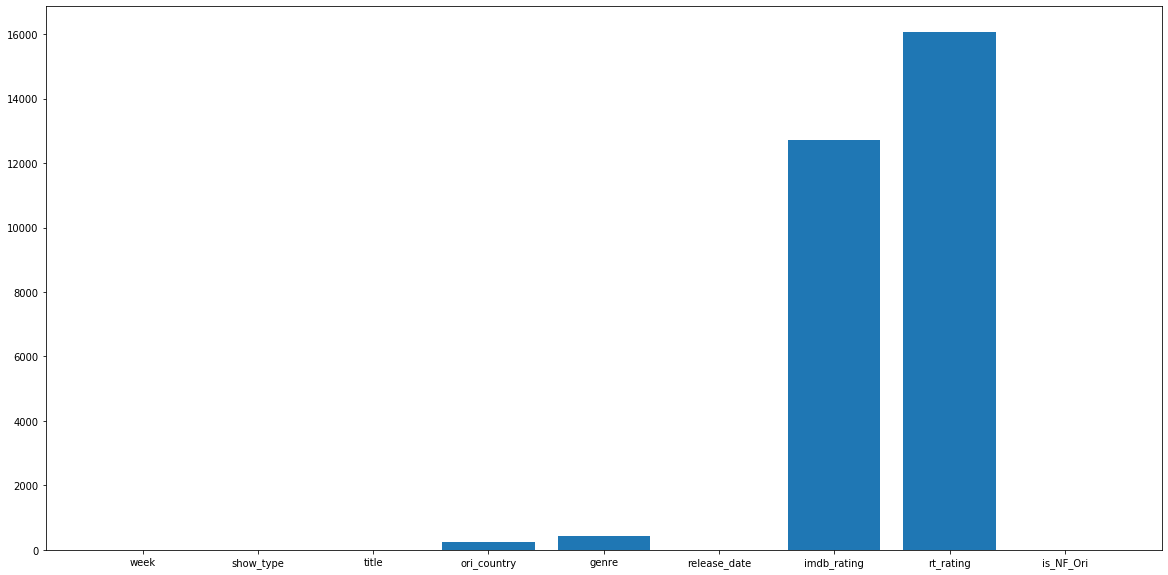

In [50]:
check_nan(df)

In [51]:
df.head()

,week,show_type,title,ori_country,genre,release_date,imdb_rating,rt_rating,is_NF_Ori
0,37,Movie,#Alive,South Korea,Horror,2020-09-08,62.0,86.0,False
1,37,TV Show,Away,USA,Science Fiction,2020-09-04,71.0,73.0,True
2,36,Movie,Skyscraper,USA,Action,2018-07-04,61.0,48.0,False
3,36,TV Show,Lucifer,USA,Superhero,2016-01-25,83.0,87.0,True
4,35,Movie,Project Power,USA,Action,2020-08-14,61.0,63.0,True


<b> <h2> fill the missing values </h2> </b> 

In [52]:
def missing_valuefill(df):
    df_final=df.copy() # copy original data 
    col=['title','ori_country','genre','imdb_rating','rt_rating']
    df=df.dropna(subset=col)
    #drop nan value for build prediction  model to predict the missing imdb and review rating 
    
    df=df.groupby('title',as_index=False)['imdb_rating','rt_rating'].median()
    #  Here  same movie is review by imdb and rt _rating diffrent week so we need to  grouping movie  by their title 
    # and take a median value 
    
    model=smf.ols('rt_rating~I(imdb_rating**2)',data=df).fit() # regression analysis 
    model1=smf.ols('imdb_rating~I(rt_rating**1)',data=df).fit()
    predict_imdb_rt=pd.DataFrame({'rt_predict':model.predict(df['imdb_rating']),
                              'imdb_predict':model1.predict(df['rt_rating'])})
    
    df_final['imdb_rating'].fillna(predict_imdb_rt['imdb_predict'],inplace=True) # fill nan value by model
    df_final['rt_rating'].fillna(predict_imdb_rt['rt_predict'],inplace=True) 
    df_final=round(df_final,0)
    df_final=df_final.dropna()
    df_final.reset_index(drop=True,inplace=True)
    
    return df_final

In [53]:
m=missing_valuefill(df)
m=m.groupby(['show_type','title','ori_country','genre','is_NF_Ori'],as_index=False)['imdb_rating','rt_rating'].median()
# Here same movie is review by imdb and rt _rating diffrent week so we need to  grouping movie  by their title 
m.reset_index(0,drop=True,inplace=True)
m.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating
0,Documentary,Becoming,USA,Documentary,True,64.0,92.0
1,Documentary,Have a Good Trip: Adventures in Psychedelics,USA,Documentary,True,73.0,47.0
2,Documentary,Money Heist: The Phenomenon,Spain,Documentary,True,78.0,59.5
3,Documentary TV,Down to Earth with Zac Efron,USA,Documentary,True,82.0,67.0
4,Documentary TV,Fear City: New York vs The Mafia,USA,Documentary,True,79.0,67.0


<h2> <b> we will prepare data for Recommandation algo  </b> </h2>
<br>
<b> Main Part Of RE (for Large dataset)  </b> 
<ul> 
<br>
    <li> <b> Question is how much movie A similar to movie B in terms of rank ? </b> </li>
<br>
    <li> <b> find n &#10006; n matrix (n=movie)</b> </li>
<br>
    <li> <b> Below pseudo_rank function  will  calculate above n &#10006; n matrix </b> </li>
    
</ul>

In [54]:
def prepare_data(data):
    col=['show_type','ori_country','genre','is_NF_Ori']
    data['merge_word'] = data[col].values.tolist()
    
    return data

In [55]:
# pd.set_option('display.max_rows', 500)

In [56]:
data_ready=prepare_data(m)
data_ready.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,merge_word
0,Documentary,Becoming,USA,Documentary,True,64.0,92.0,"[Documentary, USA, Documentary, True]"
1,Documentary,Have a Good Trip: Adventures in Psychedelics,USA,Documentary,True,73.0,47.0,"[Documentary, USA, Documentary, True]"
2,Documentary,Money Heist: The Phenomenon,Spain,Documentary,True,78.0,59.5,"[Documentary, Spain, Documentary, True]"
3,Documentary TV,Down to Earth with Zac Efron,USA,Documentary,True,82.0,67.0,"[Documentary TV, USA, Documentary, True]"
4,Documentary TV,Fear City: New York vs The Mafia,USA,Documentary,True,79.0,67.0,"[Documentary TV, USA, Documentary, True]"


In [57]:
def pseudo_probability(data_movie):
    matrix=[]
    for i in range (data_movie.shape[0]) :
        s=data_movie.loc[i,['merge_word']].values[0]
        n1=data_movie.loc[i,['title']].values

        l1=[]
        for j in range(data_movie.shape[0]):

            u= data_movie.loc[j,['merge_word']].values[0]
            m=0
            if(s[2]==u[2]):
                n2=data_movie.loc[j,['title']].values
                p1=float(data_movie.loc[j,['imdb_rating']])
                p2=float(data_movie.loc[j,['rt_rating']])
                m=1+((p1+p2)/100)
                
                if(s[3]):
                    m+=0.4

            l1.append(round(m,4))
        matrix.append(l1)
    matrix=np.array(matrix)
    n1=list(data_movie['title'])
    df_final=pd.DataFrame(data=matrix,index=n1,columns=n1)
    return df_final

In [58]:
final_data=pseudo_probability(data_ready)

In [59]:
#final_data.head()

In [60]:
print(list(final_data.index))

['Becoming', 'Have a Good Trip: Adventures in Psychedelics', 'Money Heist: The Phenomenon', 'Down to Earth with Zac Efron', 'Fear City: New York vs The Mafia', 'Jeffrey Epstein: Filthy Rich', 'Pandemic: How to Prevent an Outbreak', 'The Last Dance', 'Tiger King: Murder, Mayhem and Madness', '#Alive', '12 Strong', '17 Again', '2 Guns', '365 Days', '47 Meters Down: Uncaged', '6 Underground', '8 Mile', 'A Million Ways to Die in the West', 'A Quiet Place', 'A Simple Favor', 'A Star is Born', 'Aftermath', 'American Assassin', 'Angel Has Fallen', 'Anna', 'Aquaman', "Assassin's Creed", 'Baby Driver', 'Bad Boys for Life', 'Battleship', 'Bee Movie', 'Black and Blue', 'Blockers', 'Blood Father', 'Bulbbul', 'Bumblebee', 'Catch Me If You Can', 'Central Intelligence', 'Charlie and the Chocolate Factory', "Child's Play", "Class of '83", 'Code 8', 'Coffee & Kareem', 'Cold Pursuit', 'Contagion', 'Crazy Rich Asians', 'Dangerous Lies', 'Deadpool 2', 'Death Wish', 'Desperados', 'Despicable Me', 'Despicab

<h2> <b> This fuction help to find out similar movies (RE) </b> </h2>

In [61]:
def movie_re(similar_movie_list,data_ready):
    print("Note: please do not make any spelling mistake to enter movie name or Tv show name  just copy and paste from above list \n ")
    x=input("Enter movie or TV show from  the above list := ")
    
    df=final_data.loc[x,:].to_frame()
    df=df.sort_values(by=x,ascending=False,axis=0)
    df=df.loc[df[x]>0.3]
    df['title'] = df.index
    df.reset_index(0,drop=True, inplace=True)
    df= pd.merge(df, data_ready.loc[:,['title','show_type']],how='inner', on=['title'])
    df.drop(df.loc[df['title']==x].index, inplace=True)
    df.reset_index(0,drop=True,inplace=True)
    
    df=df[['title','show_type',x]]
    
    return df

In [64]:
movie_re(final_data,data_ready)

Note: please do not make any spelling mistake to enter movie name or Tv show name  just copy and paste from above list 
 
Enter movie or TV show from  the above list := Project Power


,title,show_type,Project Power
0,Fauda,TV Show,3.24
1,Cobra Kai,TV Show,3.22
2,Mission: Impossible - Fallout,Movie,3.17
3,Money Heist,TV Show,3.17
4,Baby Driver,Movie,3.10
5,John Wick: Chapter Two,Movie,3.05
6,Furious 7,Movie,2.94
7,Bad Boys for Life,Movie,2.91
8,Cold Pursuit,Movie,2.80
9,Extraction,Movie,2.78
